# CNN CIFAR10 Improved

CNN classification on the CIFAR10 dataset using the TF funcational API plus additional preprocessing like data augumentation and batch norm

## Import Packages

In [2]:
import tensorflow as tf
#import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
print(tf.__version__)

2.3.1


In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0 # scale images
y_train, y_test = y_train.flatten(), y_test.flatten() # reshape targets
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000,)
y_test Shape: (10000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


## Build Model

In [11]:
# Using the functional API
i = Input(shape=x_train[0].shape)
# convolutions without strides (pooling later)
# use same padding so image does not shirnk too much after so many convolutions
x = Conv2D(32, (3,3), activation='relu', padding='same')(i) 
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [12]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4366 - accuracy: 0.4969 - val_loss: 1.2073 - val_accuracy: 0.5683
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9633 - accuracy: 0.6653 - val_loss: 0.9538 - val_accuracy: 0.6672
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8125 - accuracy: 0.7173 - val_loss: 0.7598 - val_accuracy: 0.7349
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7072 - accuracy: 0.7587 - val_loss: 0.8195 - val_accuracy: 0.7256
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6272 - accuracy: 0.7832 - val_loss: 0.6564 - val_accuracy: 0.7699
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5634 - accuracy: 0.8076 - val_loss: 0.6243 - val_accuracy: 0.7914
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5087 - accuracy: 0.8275 - val_loss: 0.6111 - val_accuracy:

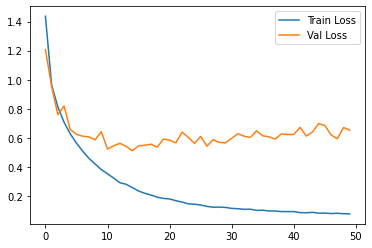

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend();

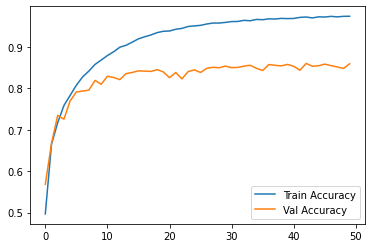

In [10]:
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Val Accuracy")
plt.legend();

## Data Augumentation

Reinitialize and complime model again else it will use the pre trained weights from the above fit

In [13]:
# Train with data augumentation
# reinitilaise and compile the model again else it will use the pre trained weights
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1, 
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator,validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 21s 14ms/step - loss: 1.5261 - accuracy: 0.4636 - val_loss: 1.0972 - val_accuracy: 0.6054
Epoch 2/50
1562/1562 [==============================] - 21s 13ms/step - loss: 1.1055 - accuracy: 0.6098 - val_loss: 0.9188 - val_accuracy: 0.6806
Epoch 3/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.9439 - accuracy: 0.6719 - val_loss: 0.8333 - val_accuracy: 0.7041
Epoch 4/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.8591 - accuracy: 0.7045 - val_loss: 0.8177 - val_accuracy: 0.7180
Epoch 5/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.7821 - accuracy: 0.7330 - val_loss: 0.8217 - val_accuracy: 0.7302
Epoch 6/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.7282 - accuracy: 0.7518 - val_loss: 0.7429 - val_accuracy: 0.7480
Epoch 7/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.6780 - accuracy: 0.7697 - val_loss: 0.6386 -

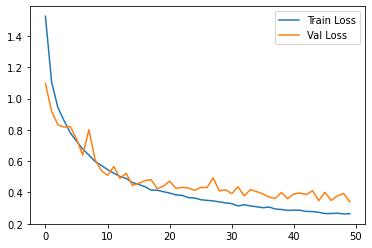

In [18]:
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend();

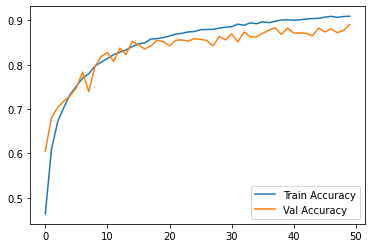

In [19]:
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Val Accuracy")
plt.legend();

## Evaluate

Confusion matrix, without normalization
[[898  14  16   7   5   0   6   4  32  18]
 [  6 964   0   0   1   0   1   0   3  25]
 [ 41   2 810  31  28  19  50  12   4   3]
 [ 11   2  19 786  35  69  47  10   9  12]
 [  4   0  17  29 884  15  27  19   1   4]
 [  7   2  20  97  18 818  21  15   1   1]
 [  5   1  12  27   5   1 945   2   2   0]
 [  8   0  13  12  16  12   6 929   1   3]
 [ 25   9   1   3   0   0   4   0 943  15]
 [ 10  44   0   3   0   1   3   0   9 930]]


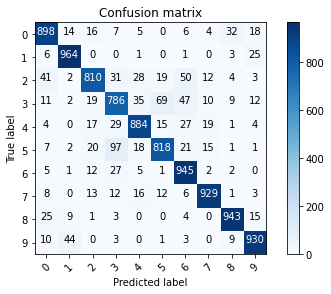

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [15]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

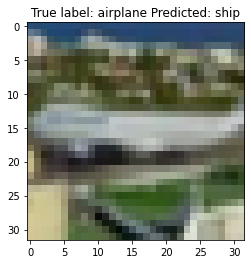

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [17]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       